## 머신러닝
# 신경망

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 신경망 수작업 계산

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
X = iris.data[:, :3] # 속성 3개
y = iris.data[:, 3] # petal_width
X.shape, y.shape

((150, 3), (150,))

In [7]:
# 가중치 초기화
W1 = np.random.randn(3, 100)
b1 = np.random.randn(100)
W2 = np.random.randn(100, 10)
b2 = np.random.randn(10)
W3 = np.random.randn(10,1)
b3 = np.random.randn(1)
W1.shape, b1.shape, W2.shape, b2.shape, W3.shape, b3.shape

((3, 100), (100,), (100, 10), (10,), (10, 1), (1,))

In [8]:
y1 = X@W1 + b1
y1[y1<0] = 0 # 활성화함수(relu) 적용
y1.shape

(150, 100)

In [9]:
y2 = y1@W2 + b2
y2[y2<0] = 0
y2.shape

(150, 10)

In [10]:
y3 = y2@W3 + b3 # 출력층에는 활성화함수 적용하지 않음 (선형회귀의 경우)
y3.shape

(150, 1)

In [11]:
y_pred = y3.ravel()
y_pred.shape

(150,)

In [12]:
mse = ((y-y_pred)**2).mean()
mse

261.72245880819014

In [13]:
y_pred

array([-11.38189812,  -4.80858705,  -9.52396588,  -7.09923173,
       -13.36177643, -13.76490226, -12.27713367,  -9.63298789,
        -5.76692324,  -5.83381857, -12.21832333,  -9.86395597,
        -5.34468311,  -9.86905752, -16.77047748, -21.11247895,
       -16.62817158, -11.38189812, -10.94773924, -15.15657293,
        -6.69779077, -13.65588026, -17.54346517,  -6.58436351,
        -8.26303747,  -3.43074215,  -8.96677186, -10.17530927,
        -9.40201981,  -7.4745042 ,  -5.67385941,  -7.86131787,
       -19.1441817 , -19.79013395,  -5.83381857,  -8.63851462,
       -10.19255875, -13.84096208,  -7.96013747,  -9.15380225,
       -12.58848697,   3.98928195, -10.96152281, -10.40627736,
       -12.31503845,  -5.34468311, -14.42916973,  -9.27574832,
       -12.69750897,  -8.85969842,  17.08880672,  12.83787107,
        18.77686209,  18.96981856,  19.67911389,  14.81136827,
        11.70913618,  11.2834114 ,  18.87719435,  11.16912845,
        18.63012655,  11.7676058 ,  23.43698879,  16.34

### 이후 작업
> - 오차(mse)를 줄이도록 가중치들(W1,b1,W2,b2,W3,b3)의 값을 바꾼다.
> - 이는 오차역전파법(backpropagation)을 이용해 수행한다.
> - tensorflow 가 하는 역할은 오차역전파법을 지원하는 것이다.

### tensorflow 와 keras 적용

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
tf.__version__

'2.9.0'

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
X = iris.data[:, :3] # 속성 3개
y = iris.data[:, 3] # petal_width
X.shape, y.shape

((150, 3), (150,))

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-20 19:27:22.734008: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-20 19:27:22.734632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________


In [21]:
y_pred = model.predict(X)
y_pred.shape

2022-05-20 19:27:23.502887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-20 19:27:23.548585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 3ms/step


(150, 1)

### 신경망 훈련

In [22]:
model.compile(loss='mse', optimizer='adam')

In [23]:
history = model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50


2022-05-20 19:27:24.663622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 2s 51ms/step - loss: 2.0990
Epoch 2/50
5/5 [==============================] - 0s 5ms/step - loss: 0.8441
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3829
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 0.3273
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 0.3278
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 0.2550
Epoch 7/50
5/5 [==============================] - 0s 5ms/step - loss: 0.1804
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1486
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1316
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 0.1075
Epoch 11/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0872
Epoch 12/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0736
Epoch 13/50
5/5 [==============================] - 0s 4ms/step - loss: 0.0631
Epoch

In [24]:
y_pred = model.predict(X)

5/5 [==============================] - 0s 3ms/step


2022-05-20 19:27:27.408578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


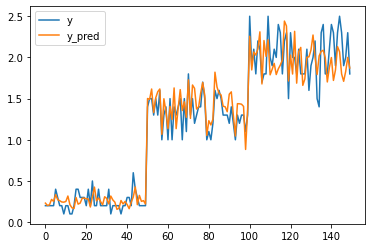

In [25]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y', 'y_pred'])

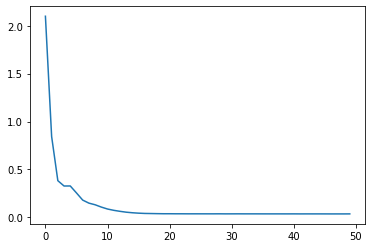

In [26]:
plt.plot(history.history['loss'])

### MNIST 분류

In [27]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [28]:
28*28

784

In [29]:
X_train.max(), X_train.min()

(255, 0)

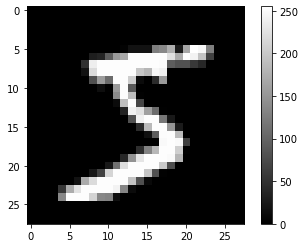

In [30]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()

In [31]:
### 데이터 전처리
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [32]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [33]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # 10개 클래스로 분류 => softmax

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [36]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20


2022-05-20 19:27:32.365894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - ETA: 0s - loss: 0.2948 - acc: 0.9137

2022-05-20 19:27:43.290956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1407/1407 [==============================] - 14s 9ms/step - loss: 0.2948 - acc: 0.9137 - val_loss: 0.1634 - val_acc: 0.9521
Epoch 2/20
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1253 - acc: 0.9625 - val_loss: 0.1339 - val_acc: 0.9611
Epoch 3/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0853 - acc: 0.9739 - val_loss: 0.1073 - val_acc: 0.9677
Epoch 4/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0674 - acc: 0.9788 - val_loss: 0.1028 - val_acc: 0.9689
Epoch 5/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0522 - acc: 0.9835 - val_loss: 0.1076 - val_acc: 0.9695
Epoch 6/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0413 - acc: 0.9866 - val_loss: 0.1066 - val_acc: 0.9711
Epoch 7/20
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0350 - acc: 0.9886 - val_loss: 0.1174 - val_acc: 0.9696
Epoch 8/20
1407/1407 [==============================] - 12s 8ms/st

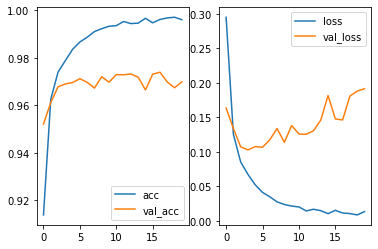

In [37]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [38]:
y_pred = model.predict(X_test)
y_pred.shape

 92/313 [=======>......................] - ETA: 0s

2022-05-20 19:31:31.284574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [39]:
y_pred[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 8, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [40]:
y_test[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

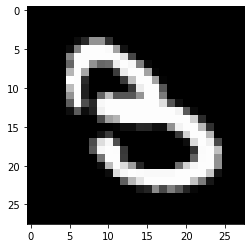

In [41]:
plt.imshow(X_test[18].reshape(28,28), cmap='gray')

### 딥러닝 적용
- CNN : Convolution Neural Network

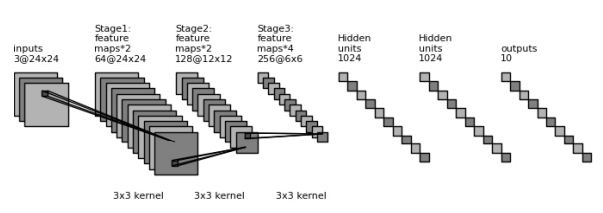

- convolution
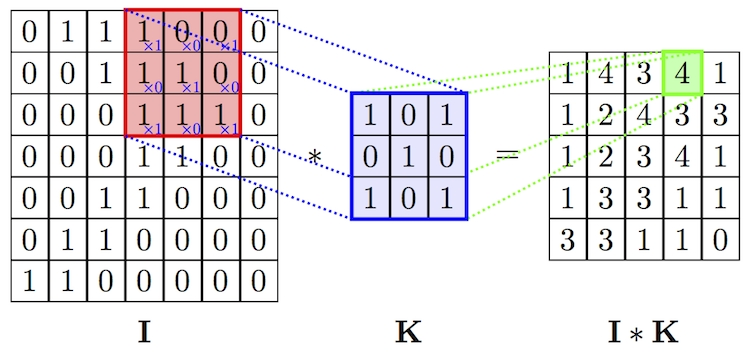

- pooling
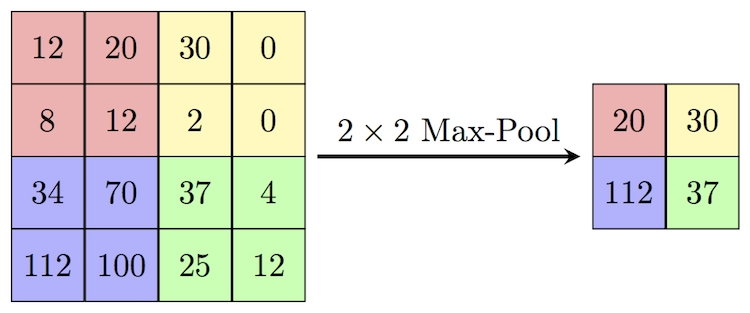

In [42]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [43]:
### 데이터 전처리
X_train = X_train.reshape(-1,28,28,1)/255 # 0~1 사이의 값으로 정규화
X_test = X_test.reshape(-1,28,28,1)/255
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [44]:
### 원핫인코딩
y_train = np.eye(10)[y_train]
y_test  = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), padding='same',
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=60, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=120, kernel_size=(3,3), padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 60)        16260     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         64920     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 120)       

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [48]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.25)

Epoch 1/10


2022-05-20 19:31:33.248608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


450/450 [==============================] - ETA: 0s - loss: 0.2217 - acc: 0.9328

2022-05-20 19:31:42.300846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


450/450 [==============================] - 11s 20ms/step - loss: 0.2217 - acc: 0.9328 - val_loss: 0.0624 - val_acc: 0.9809
Epoch 2/10
450/450 [==============================] - 9s 19ms/step - loss: 0.0557 - acc: 0.9826 - val_loss: 0.0523 - val_acc: 0.9837
Epoch 3/10
450/450 [==============================] - 9s 19ms/step - loss: 0.0355 - acc: 0.9892 - val_loss: 0.0391 - val_acc: 0.9882
Epoch 4/10
450/450 [==============================] - 8s 19ms/step - loss: 0.0289 - acc: 0.9909 - val_loss: 0.0355 - val_acc: 0.9886
Epoch 5/10
450/450 [==============================] - 9s 19ms/step - loss: 0.0237 - acc: 0.9923 - val_loss: 0.0365 - val_acc: 0.9888
Epoch 6/10
450/450 [==============================] - 9s 19ms/step - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0387 - val_acc: 0.9886
Epoch 7/10
450/450 [==============================] - 9s 19ms/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0425 - val_acc: 0.9885
Epoch 8/10
450/450 [==============================] - 9s 19ms/step - loss: 0.01

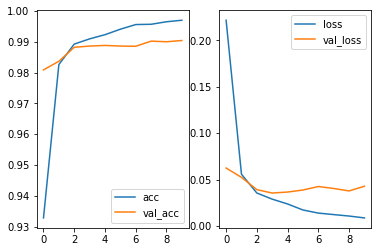

In [49]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [50]:
y_pred = model.predict(X_test)
y_pred.shape

  1/313 [..............................] - ETA: 1:02

2022-05-20 19:33:01.199238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step


(10000, 10)

In [51]:
np.where(y_pred.argmax(axis=1) != y_test.argmax(axis=1)) # 틀린 이미지 번호

(array([  18,  247,  326,  340,  445,  449,  646,  659,  716,  740,  947,
        1014, 1112, 1182, 1226, 1232, 1549, 1621, 1709, 1773, 1901, 2018,
        2035, 2040, 2043, 2118, 2130, 2182, 2414, 2447, 2462, 2597, 2607,
        2654, 2659, 2678, 2771, 2927, 2939, 3225, 3422, 3441, 3451, 3520,
        3534, 3558, 3727, 3762, 3767, 3778, 3780, 3808, 3941, 4078, 4100,
        4176, 4201, 4238, 4289, 4443, 4487, 4497, 4712, 4740, 4761, 4807,
        4860, 4943, 5654, 5752, 5937, 5955, 6571, 6572, 6576, 6597, 7434,
        7732, 8316, 9009, 9015, 9530, 9540, 9642, 9679, 9700, 9729, 9770,
        9982]),)

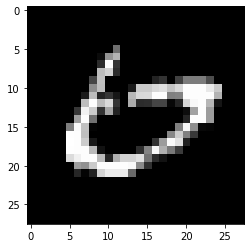

In [52]:
plt.imshow(X_test[445,:,:,0], cmap='gray')

In [53]:
(y_pred.argmax(axis=1) == y_test.argmax(axis=1)).mean() # 정확도 계산

0.9911